# **VISUALIZACIÓN DE DATOS**

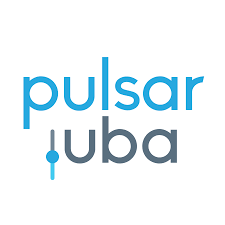

*UNA VARIABLE UN CASO*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Year
2020.0     2.7
2021.0     3.6
2022.0     5.9
2023.0     9.5
2024.0    13.4
Name: Inflación, dtype: float64


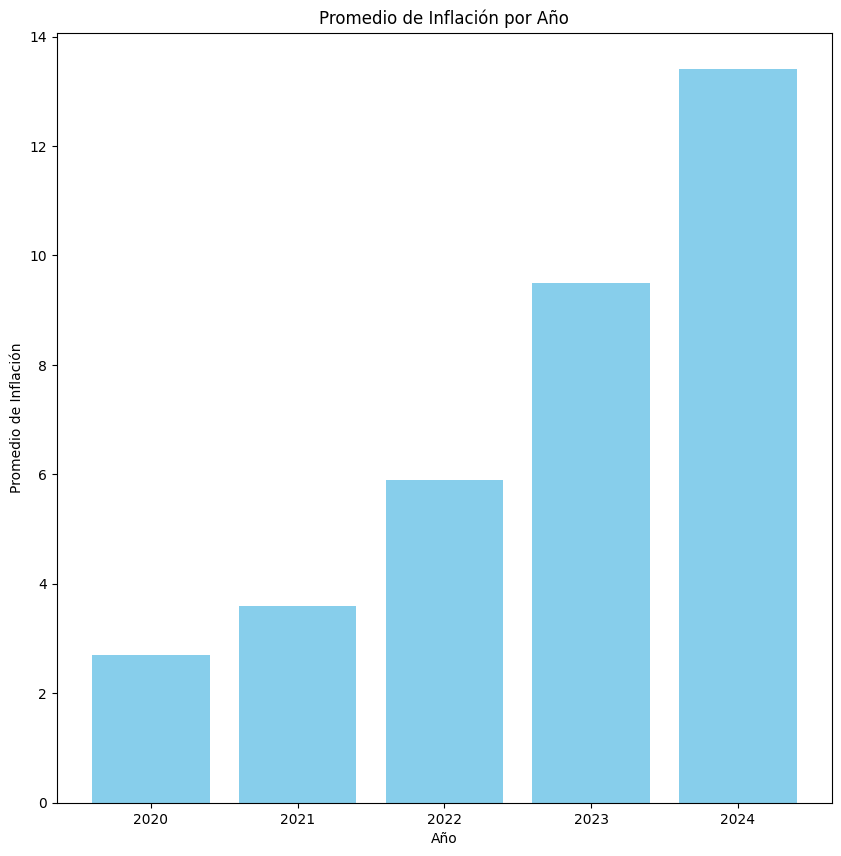

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from patsy import dmatrices
from google.colab import drive

plt.rcParams['figure.figsize']=[10,10]

drive.mount('/content/drive')

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Encuestas.csv'

# Leer el archivo CSV especificando la codificación correcta
df = pd.read_csv(file_path, encoding='latin1')

# Da formato Datetime al campo Fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], format='mixed', dayfirst=True, errors='coerce')

# Extrae el año del campo Fecha
df['Year'] = df['Fecha'].dt.year

#Calcula promedio agrupado por año
promedio_inflacion_por_anio = df.groupby(pd.Grouper(key='Year'))['Inflación'].mean()

#Redondea a dos caracteres el promedio
promedio_inflacion_por_anio = round(promedio_inflacion_por_anio,1)

print(promedio_inflacion_por_anio)

# Graficar un gráfico de barras
plt.bar(promedio_inflacion_por_anio.index, promedio_inflacion_por_anio.values, color='skyblue')
plt.xlabel('Año')  # Etiqueta del eje x
plt.ylabel('Promedio de Inflación')  # Etiqueta del eje y
plt.title('Promedio de Inflación por Año')  # Título del gráfico
plt.xticks(promedio_inflacion_por_anio.index)  # Etiquetas del eje x
plt.show()





*DOS VARIABLES UN CASO*

In [ ]:

# Agrupar por los campos 'Presidente', 'Dias de presidencia' y  'Aprobación presidencial'
resultado = df[['Presidente', 'Días de presidencia','Aprueba']]
print(resultado)



            Presidente  Días de presidencia  Aprueba
0    Alberto Fernández                   72     59.0
1    Alberto Fernández                   81     45.0
2    Alberto Fernández                   81     49.0
3    Alberto Fernández                   81     55.0
4    Alberto Fernández                   87     52.0
..                 ...                  ...      ...
307       Javier Milei                  123     46.0
308       Javier Milei                  123     40.2
309       Javier Milei                  124     49.0
310       Javier Milei                  137     45.0
311       Javier Milei                  127     45.3

[312 rows x 3 columns]


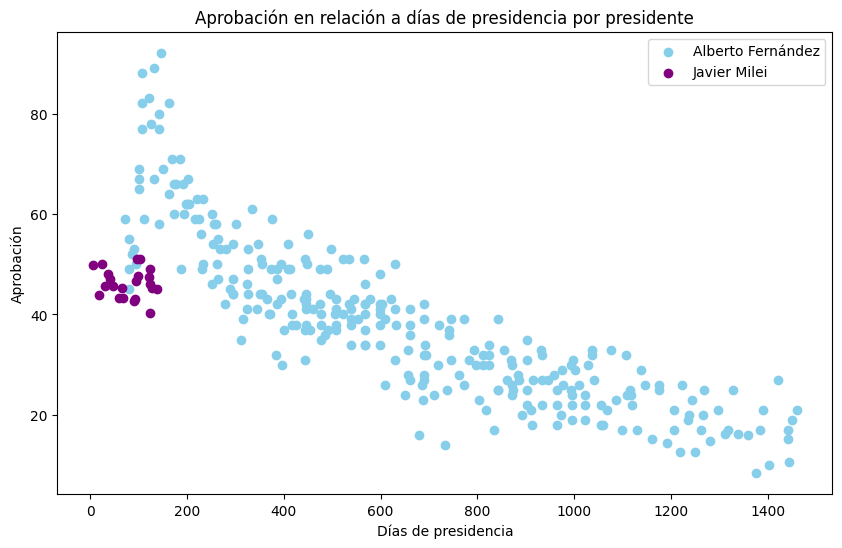

In [ ]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
colors = {'Alberto Fernández': 'Skyblue', 'Javier Milei': 'purple'}
# Iterar sobre cada presidente para graficar sus datos
for presidente, datos in df.groupby('Presidente'):
    plt.scatter(datos['Días de presidencia'], datos['Aprueba'], label=presidente, color=colors[presidente])

# Configurar el gráfico
plt.xlabel('Días de presidencia')
plt.ylabel('Aprobación')
plt.title('Aprobación en relación a días de presidencia por presidente')
plt.legend()  # Mostrar leyenda con los nombres de los presidentes

# Mostrar el gráfico
plt.show()

*DOS VARIABLES DOS CASOS*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


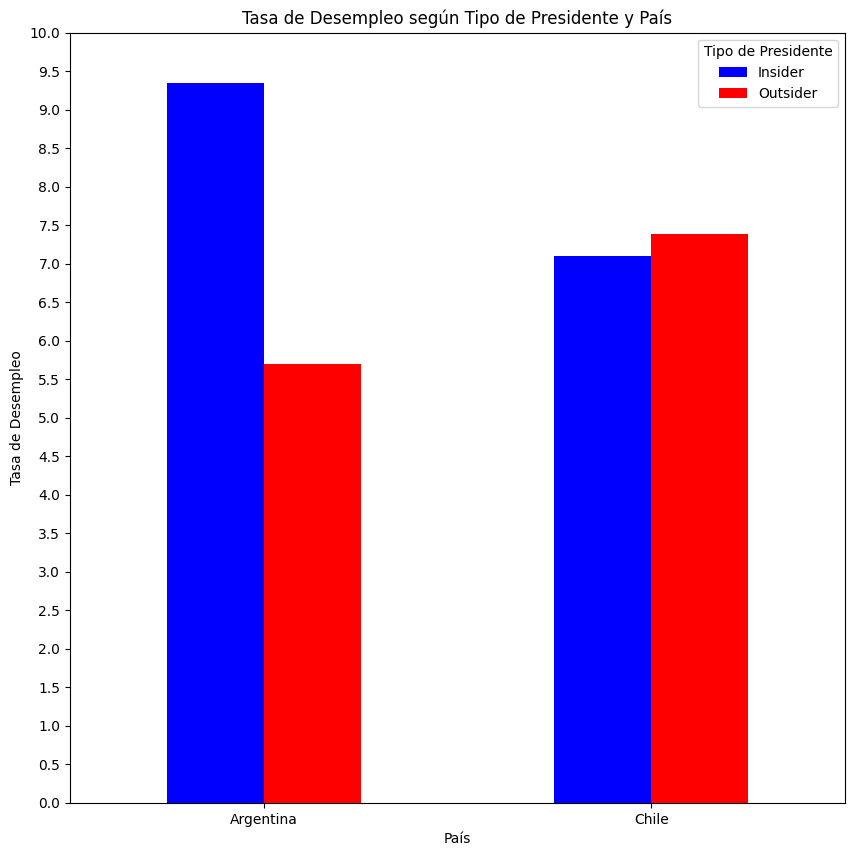

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from patsy import dmatrices
from google.colab import drive

plt.rcParams['figure.figsize']=[10,10]

drive.mount('/content/drive')

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Encuestas Aprobación Presidencial.xlsx'

# Leer el archivo CSV especificando la codificación correcta
df_Argentina = pd.read_excel(file_path, sheet_name='Argentina')


df_chile = pd.read_excel(file_path, sheet_name='Chile')


df_Argentina['Pais'] = 'Argentina'
df_Argentina.head()

df_chile['Pais'] = 'Chile'
df_chile.head()

df_Argentina = df_Argentina[['Pais','Tipo de Presidente','Tasa Desempleo']]
df_chile = df_chile[['Pais', 'Tipo de Presidente', 'Tasa Desempleo']]

df_Argentina.head()
df_chile.head()

df = pd.concat([df_Argentina, df_chile], ignore_index=True)

colors = {'Insider': 'blue', 'Outsider': 'red'}
# Calcular el promedio de la tasa de desempleo por tipo de presidente
grupo = df.groupby(['Pais', 'Tipo de Presidente'])['Tasa Desempleo'].mean().unstack()
grupo.plot(kind='bar', stacked=False, color=colors.values())

# Configurar el gráfico
plt.xlabel('País')
plt.ylabel('Tasa de Desempleo')
plt.title('Tasa de Desempleo según Tipo de Presidente y País')
plt.legend(title='Tipo de Presidente')

plt.xticks(rotation=0)  # Sin rotación en las etiquetas del eje x
plt.yticks([i/2 for i in range(0, 21, 1)])  # Intervalos de 2 en 2 en el eje y, de 0 a 20
# Mostrar el gráfico
plt.show()